# **Data Visualization Deep Dive**

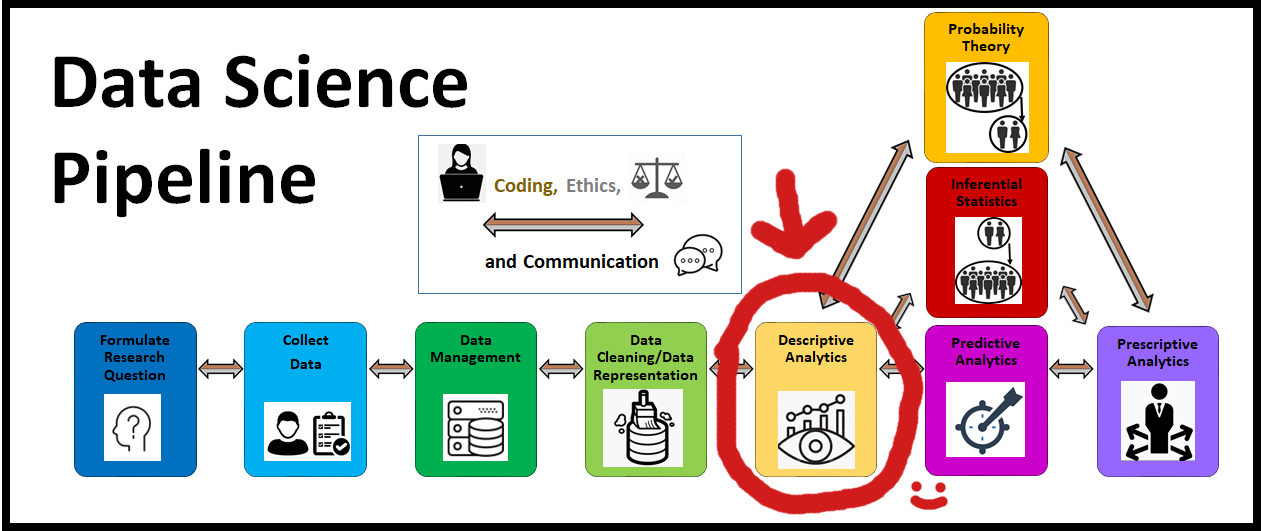

Welcome to the data visualization workshop! After your data is all cleaned up, the next step is to start with some **exploratory data analysis** (EDA). This involves looking for trends and relationships in the data that might help with your goal, which in our case is building a model. While you could try and spot patterns by looking at hundreds of thousands of numbers in Excel, our preferred method is using data visualization. In this workshop, we will use `matplotlib`, `seaborn`, and `altair`, three of the most popular data visualization libraries in Python, to construct scatterplots, heatmaps, and other graphs that you can use with your own data.

If you don't have `pandas`, `numpy`, `matplotlib`, `seaborn`, or `altair` installed, remove the # below and run the cell.

In [1]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install altair

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colormaps
from matplotlib.colors import CenteredNorm
import seaborn as sns
import altair as alt

The first dataset we will work with contains information about university-owned buildings in Illinois. Each row contains information on the building's location, square footage, the year it was acquired, its number of floors, and more. 

In [3]:
df = pd.read_csv("building_inventory.csv", 
                 na_values={'Square Footage': 0, 'Year Constructed':0,'Year Acquired':0}) 

In [4]:
df.head()

Agency Name  \
0  Department of Natural Resources   
1  Department of Natural Resources   
2  Department of Natural Resources   
3  Department of Natural Resources   
4  Department of Natural Resources   

                                     Location Name             Address  \
0  Anderson Lake Conservation Area - Fulton County  Anderson Lake C.a.   
1  Anderson Lake Conservation Area - Fulton County  Anderson Lake C.a.   
2  Anderson Lake Conservation Area - Fulton County  Anderson Lake C.a.   
3  Anderson Lake Conservation Area - Fulton County  Anderson Lake C.a.   
4  Anderson Lake Conservation Area - Fulton County  Anderson Lake C.a.   

      City  Zip code  County  Congress Dist Congressional Full Name  Rep Dist  \
0  Astoria     61501  Fulton             17            Cheri Bustos        93   
1  Astoria     61501  Fulton             17            Cheri Bustos        93   
2  Astoria     61501  Fulton             17            Cheri Bustos        93   
3  Astoria     61501  Fulton             17            Cheri Bustos        93   
4  Astoria     61501  Fulton             17            Cheri Bustos        93   

       Rep Full Name  ...  Bldg Status Year Acquired Year Constructed  \
0  Hammond Norine K.  ...       In Use        1975.0           1975.0   
1  Hammond Norine K.  ...       In Use        2004.0           2004.0   
2  Hammond Norine K.  ...       In Use        2004.0           2004.0   
3  Hammond Norine K.  ...       In Use        2004.0           2004.0   
4  Hammond Norine K.  ...       In Use        2004.0           2004.0   

   Square Footage  Total Floors  Floors Above Grade  Floors Below Grade  \
0           144.0             1                   1                   0   
1           144.0             1                   1                   0   
2           144.0             1                   1                   0   
3           144.0             1                   1                   0   
4           144.0             1                   1                   0   

   Usage Description  Usage Description 2 Usage Description 3  
0            Unusual              Unusual        Not provided  
1            Unusual              Unusual        Not provided  
2            Unusual              Unusual        Not provided  
3            Unusual              Unusual        Not provided  
4            Unusual              Unusual        Not provided  

[5 rows x 22 columns]

In [5]:
df.columns

Index(['Agency Name', 'Location Name', 'Address', 'City', 'Zip code', 'County',
       'Congress Dist', 'Congressional Full Name', 'Rep Dist', 'Rep Full Name',
       'Senate Dist', 'Senator Full Name', 'Bldg Status', 'Year Acquired',
       'Year Constructed', 'Square Footage', 'Total Floors',
       'Floors Above Grade', 'Floors Below Grade', 'Usage Description',
       'Usage Description 2', 'Usage Description 3'],
      dtype='object')

Let's start with a basic scatterplot, graphing `Year Acquired` against `Square Footage` to look for a relationship. Do more recently-acquired buildings tend to be bigger?

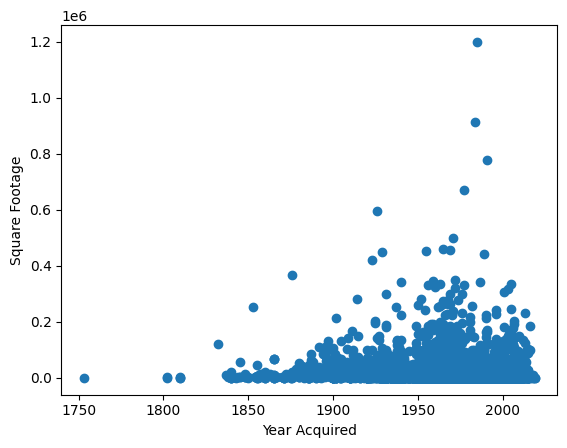

In [6]:
plt.scatter(x=df['Year Acquired'], y=df['Square Footage'])
plt.xlabel("Year Acquired")
plt.ylabel("Square Footage")
plt.show()

Most of our data is clustered around low square-footages, which makes it hard to identify trends. In this case, we can try adjusting the scale of the graph. There are a couple ways to do this, the first is by rescaling our `y` variable. Let's try a square-root scale, which is good for squashing down small values and spreading out low clusters. All we have to do is instead plot `Year Acquired` against the **square root** of `Square Footage` (sounds like it's just "footage" now!)

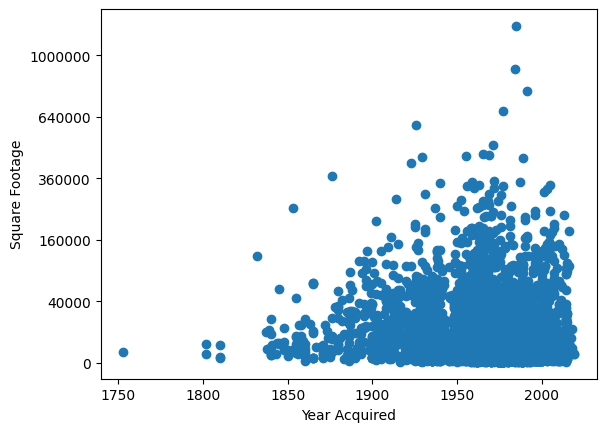

In [7]:
plt.scatter(x=df['Year Acquired'], y=np.sqrt(df['Square Footage']))
plt.yticks(ticks=list(range(0, 1200, 200)), labels=np.square(list(range(0, 1200, 200))))
plt.xlabel("Year Acquired")
plt.ylabel("Square Footage")
plt.show()

Looks better, but we still have quite the cluster. Another scale we could use that spreads the data even further is a log scale. Instead of manually transforming our `y` variable, we can just use `plt.yscale('log')`.

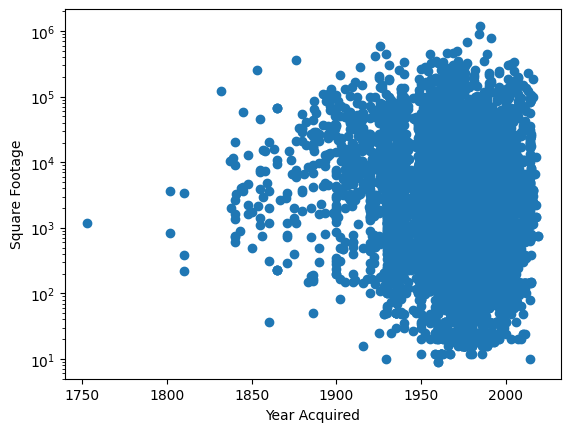

In [8]:
# matplotlib version

plt.scatter(x=df['Year Acquired'], y=df['Square Footage'])
plt.xlabel("Year Acquired")
plt.ylabel("Square Footage")
plt.yscale('log') 
plt.show()

The vertical clustering is gone! This allows us to confirm that there doesn't seem to be a trend in the average square footage increasing or decreasing over time.

Now, how could we make the same plot using other visualization tools, like `seaborn` or `altair`?

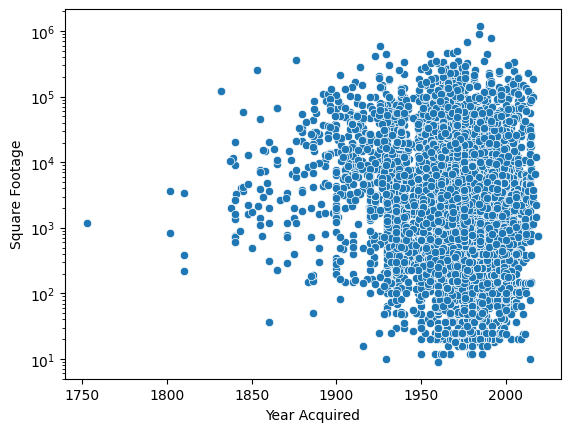

In [9]:
# seaborn version

sns.scatterplot(
    data=df,
    x='Year Acquired',
    y='Square Footage'
)

plt.xlabel("Year Acquired")
plt.ylabel("Square Footage")
plt.yscale('log')
plt.show()

Note that using `seaborn`, we can still add labels and things using `matplotlib`. `altair` is quite different, but once you get used to it, it offers great customization options.

In [10]:
# altair version

alt.data_transformers.disable_max_rows() # if we don't add this, altair gets mad at us for having too many data points

alt.Chart(df).mark_circle(size=60, opacity=0.6, color='#AA83DE').encode( # use hex codes for 
    x=alt.X(
        'Year Acquired:Q', # the ":Q" means this variable is Quantitative
        axis=alt.Axis(format='d'), # display years as integers without commas
        title='Year Acquired',
        scale=alt.Scale(domain=[1750, 2025]) # x axis domain
    ),
    y=alt.Y(
        'Square Footage:Q', 
        title='Square Footage',
        scale=alt.Scale(type='log') # set scale
    ), 
    tooltip=['Year Acquired:Q', 'Square Footage:Q'] # adds tooltips when points are hovered over
).properties( # set figure size
    width=600,
    height=400
).interactive() # lets us zoom!

alt.Chart(...)

`altair` is interactive! That means we can zoom in on our scatterplot and hover over a point to see its exact value. (double click on the plot to return to the default zoom)

Next, let's look at the Illinois cities with the most university-owned buildings.

In [11]:
top_cities = df['City'].value_counts()[:5]
top_cities

City
Springfield    413
Carbondale     258
Grafton        231
Chicago        229
Urbana         204
Name: count, dtype: int64

For this, we can use a bar plot. The most interesting thing to note here is the colormap, which automatically assigns each bar a color from your specified palette, in this case `'Pastel1'`. If you want to try out some other colormap, the full list is available [here](https://matplotlib.org/stable/users/explain/colors/colormaps.html) in the `matplotlib` documentation. Just make sure to pick a palette that fits our visualization! (something... <span style="color:pink">qualitative</span>)

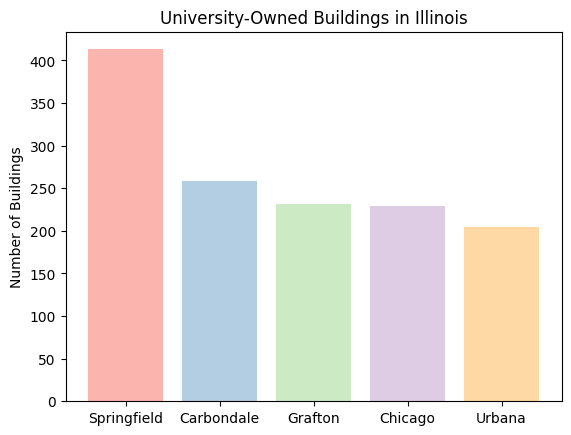

In [12]:
# matplotlib version

plt.bar(top_cities.index, top_cities.values, color=colormaps['Pastel1'].colors)
plt.ylabel("Number of Buildings")
plt.title("University-Owned Buildings in Illinois")
plt.show()

The process is similar using `seaborn`. A guide to its color palettes can be found [here](https://seaborn.pydata.org/tutorial/color_palettes.html).

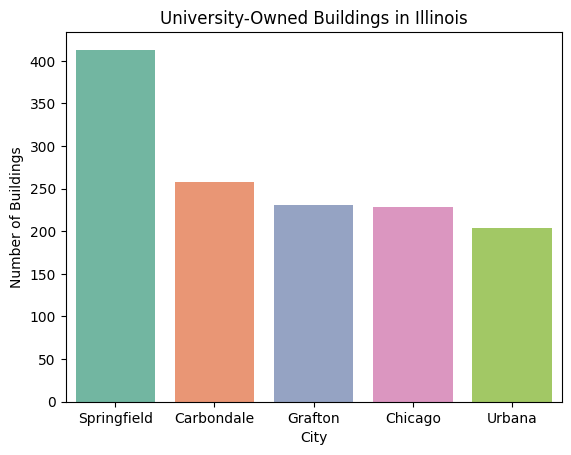

In [31]:
# seaborn version

sns.barplot(
    x=top_cities.index,
    y=top_cities.values,
    hue=top_cities.index,
    palette='Set2'
)

plt.ylabel("Number of Buildings")
plt.title("University-Owned Buildings in Illinois")
plt.show()

`altair`'s is more complicated, but you get a more customizable plot, and you can hover over the bars to see exact values. Color palettes [here](https://vega.github.io/vega/docs/schemes/).

In [14]:
# altair version

city_df = pd.DataFrame({
    'City': top_cities.index,
    'Number of Buildings': top_cities.values
})

alt.Chart(city_df).mark_bar().encode(
    x=alt.X(
        'City:N', # the ":N" means this variable is Nominal (categorical)
        title=None,
        sort='-y',
        axis=alt.Axis(labelAngle=0) # switches labels to be horizontal
    ),
    y=alt.Y(
        'Number of Buildings:Q', # the ":Q" means this variable is Quantitative
        title='Number of Buildings'
    ),
    color=alt.Color(
        'City:N',
        scale=alt.Scale(scheme='tableau10'),
        legend=None
    ),
    tooltip=['City:N', 'Number of Buildings:Q']
).properties(
    title='University-Owned Buildings in Illinois',
    width=600,
    height=400
)

alt.Chart(...)

What if we want to view something more than just counts, like the distribution of the number of floors in each city?

In [15]:
df_top_cities = df[df.City.isin(top_cities.index)] # only select observations from these 5 cities

In [16]:
top_cities_floors = df_top_cities.groupby("City").agg('max', numeric_only=True)['Total Floors'].sort_values() # find the building with the most floors in each
top_cities_floors

City
Grafton         4
Carbondale     10
Urbana         13
Springfield    16
Chicago        31
Name: Total Floors, dtype: int64

We can use a violin plot! Violin plots are similar to box plots but with more information; rather than just the quantiles, violin plots display the distributions for each city.

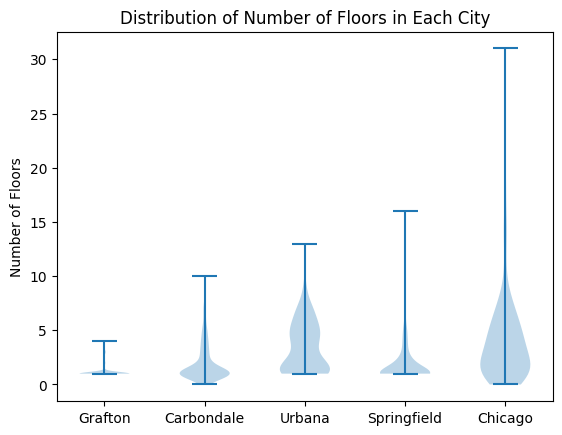

In [17]:
# matplotlib version

plt.violinplot(dataset= 
    [df[df.City == "Grafton"]['Total Floors'].values,
    df[df.City == "Carbondale"]['Total Floors'].values,
    df[df.City == "Urbana"]['Total Floors'].values,
    df[df.City == "Springfield"]['Total Floors'].values,
    df[df.City == "Chicago"]['Total Floors'].values]
)

plt.xticks(ticks=list(range(1, 6)), labels=top_cities_floors.index)
plt.ylabel("Number of Floors")
plt.title("Distribution of Number of Floors in Each City")
plt.show()

# this is easier in seaborn... 

This is an example where using `seaborn` is actually easier (and, we can add some color!)

In [36]:
list(top_cities_floors.index)

['Grafton', 'Carbondale', 'Urbana', 'Springfield', 'Chicago']

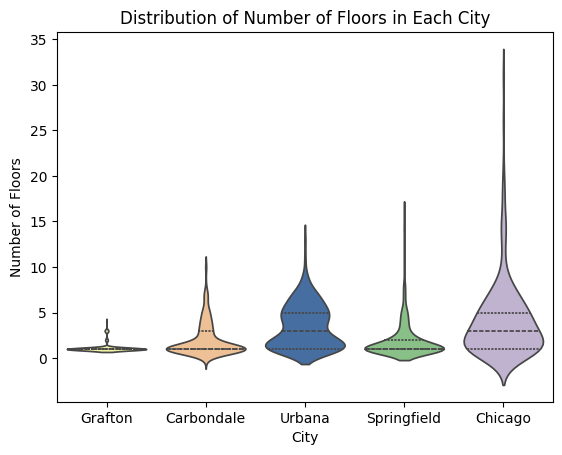

In [39]:
# seaborn version

sns.violinplot(
    data=df_top_cities,
    x="City",
    y="Total Floors",
    hue="City",
    palette="Accent",
    inner="quartile",
    order=list(top_cities_floors.index)
)

plt.ylabel("Number of Floors")
plt.title("Distribution of Number of Floors in Each City")
plt.show()

The next visualization is one of the most important and reusable graphs you'll ever have; a **correlation heatmap**. When we have a bunch of variables, it's common for us to want to know how they are correlated with one another. This is a vital question in both modeling and descriptive analytics; those of you familiar with linear regression know this. So, let's generate a correlation matrix! Each entry in this matrix represents the correlation between the two variables intersecting.

In [19]:
correlation = df.corr(numeric_only=True)
correlation

Zip code  Congress Dist  Rep Dist  Senate Dist  \
Zip code            1.000000       0.218866  0.598157     0.600344   
Congress Dist       0.218866       1.000000  0.346628     0.348020   
Rep Dist            0.598157       0.346628  1.000000     0.999696   
Senate Dist         0.600344       0.348020  0.999696     1.000000   
Year Acquired       0.069296       0.067275  0.079117     0.079571   
Year Constructed    0.062193       0.046652  0.074628     0.075060   
Square Footage     -0.057570      -0.122240 -0.115834    -0.115338   
Total Floors       -0.089551      -0.112438 -0.140791    -0.140414   
Floors Above Grade -0.082180      -0.102596 -0.126999    -0.126558   
Floors Below Grade -0.077634      -0.098043 -0.137211    -0.137039   

                    Year Acquired  Year Constructed  Square Footage  \
Zip code                 0.069296          0.062193       -0.057570   
Congress Dist            0.067275          0.046652       -0.122240   
Rep Dist                 0.079117          0.074628       -0.115834   
Senate Dist              0.079571          0.075060       -0.115338   
Year Acquired            1.000000          0.912292       -0.077190   
Year Constructed         0.912292          1.000000       -0.075795   
Square Footage          -0.077190         -0.075795        1.000000   
Total Floors            -0.281248         -0.299877        0.613257   
Floors Above Grade      -0.251619         -0.270222        0.617292   
Floors Below Grade      -0.332969         -0.349383        0.368142   

                    Total Floors  Floors Above Grade  Floors Below Grade  
Zip code               -0.089551           -0.082180           -0.077634  
Congress Dist          -0.112438           -0.102596           -0.098043  
Rep Dist               -0.140791           -0.126999           -0.137211  
Senate Dist            -0.140414           -0.126558           -0.137039  
Year Acquired          -0.281248           -0.251619           -0.332969  
Year Constructed       -0.299877           -0.270222           -0.349383  
Square Footage          0.613257            0.617292            0.368142  
Total Floors            1.000000            0.967976            0.744792  
Floors Above Grade      0.967976            1.000000            0.591651  
Floors Below Grade      0.744792            0.591651            1.000000

The table is nice and all, but when we have many variables, it's difficult to look at that mess of numbers and get a quick measure of which variables are strongly correlated. Instead, we use a heatmap.

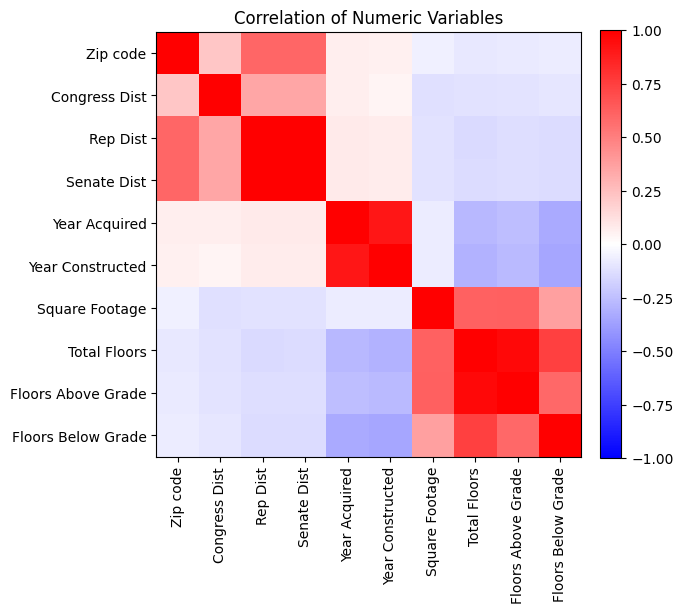

In [20]:
# matplotlib version

plt.figure(figsize=(6, 6))
plt.imshow(correlation, cmap='bwr', norm=CenteredNorm()) # centers colorbar around 0 
plt.xticks(range(10), labels=correlation.columns.values, rotation=90)
plt.yticks(range(10), labels=correlation.columns.values)
plt.colorbar(fraction=0.046, pad=0.04) # scale colorbar to be same size as plot 
plt.title("Correlation of Numeric Variables")
plt.show()

Now it's much easier to spot highly correlated variables. The <span style="color:pink;">red</span>-<span style="color:lightblue;">blue</span> color scheme is extremely common for heatmaps; red naturally lends itself to "warmer" or "higher" values while blue does the opposite.

`seaborn` has a dedicated `.heatmap` function, which some might find more intuitive.

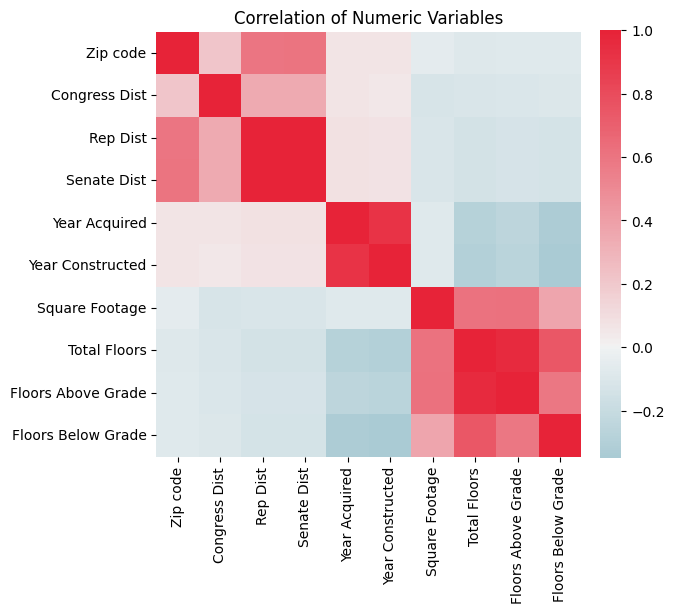

In [21]:
# seaborn version

plt.figure(figsize=(6, 6))
sns.heatmap(
    correlation,
    cmap=sns.diverging_palette(220, 10, s=90, as_cmap=True), # custom color map!
    center=0,
    square=True,
    cbar_kws={'fraction': 0.046, 'pad': 0.04},
    annot=False
)

plt.title("Correlation of Numeric Variables")
plt.show()

`altair` is quite annoying when it comes to heatmaps, but it can be done. And you get that nice interactivity.

In [22]:
# altair version

corr_long = (
    correlation
    .reset_index()
    .melt(id_vars='index', var_name='Variable 1', value_name='Correlation')
    .rename(columns={'index': 'Variable 2'})
)

alt.Chart(corr_long).mark_rect().encode(
    x=alt.X(
        'Variable 1:N',
        title=None,
        sort=correlation.columns.tolist(),
        axis=alt.Axis(labelAngle=90)
    ),
    y=alt.Y(
        'Variable 2:N',
        title=None,
        sort=correlation.columns.tolist()
    ),
    color=alt.Color(
        'Correlation:Q',
        scale=alt.Scale(
            scheme='redblue',
            reverse=True,
            domain=[-1, 1]
        ),
        legend=alt.Legend(
            title='Correlation',
            titleFontSize=10,
            labelFontSize=10,
            gradientLength=386,
            gradientThickness=20 # customization for color bar
        )
    ), 
    tooltip=['Variable 1:N', 'Variable 2:N', 'Correlation:Q']
).properties(
    title='Correlation of Numeric Variables',
    width=400,
    height=400
)

alt.Chart(...)

To emphasize how nice heatmaps are, let's try an example with some real <span style="color:orange;">heat</span>. The following dataframe contains information on daily minimum temperatures in Champaign.

In [23]:
weather = pd.read_parquet("weather-train.parquet")
weather.head()

temperature_2m_min  year  month  day  day_of_year
date                                                         
2016-01-01             -4.2715  2016      1    1            1
2016-01-02             -3.8715  2016      1    2            2
2016-01-03             -4.4715  2016      1    3            3
2016-01-04             -3.0215  2016      1    4            4
2016-01-05             -5.7715  2016      1    5            5

In [24]:
# if you get an import error try installing any suggested packages 

In [25]:
year_2016 = weather[weather.year == 2016] # select only data in 2016
year_2016

temperature_2m_min  year  month  day  day_of_year
date                                                         
2016-01-01             -4.2715  2016      1    1            1
2016-01-02             -3.8715  2016      1    2            2
2016-01-03             -4.4715  2016      1    3            3
2016-01-04             -3.0215  2016      1    4            4
2016-01-05             -5.7715  2016      1    5            5
...                        ...   ...    ...  ...          ...
2016-12-27             -2.4715  2016     12   27          362
2016-12-28             -3.3215  2016     12   28          363
2016-12-29              0.1785  2016     12   29          364
2016-12-30             -3.0215  2016     12   30          365
2016-12-31              0.6285  2016     12   31          366

[366 rows x 5 columns]

We want to make a heatmap of temperature, where each cell represents one day of the year. To do that, we need to reformat our dataframe into a table where the rows represent months and the columns represent the days; that's simply how `matplotlib` heatmaps work. Luckily, we have `.pivot`, where `index` represents which column of our dataframe should be the rows of the new table and `columns` represents which should be the columns. `values` is where the actual entries come from. (`altair` actually doesn't need this transformation!)

In [26]:
months = ['January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

heatmap = year_2016.pivot(index="month", columns="day", values="temperature_2m_min")
heatmap

day           1          2          3          4          5          6   \
month                                                                     
1      -4.271500  -3.871500  -4.471500  -3.021500  -5.771500  -3.771500   
2      -0.221500   0.678500   0.328500  -5.571500  -4.371500  -5.471500   
3      -1.071500  -6.921500   0.278500  -3.271500   0.078500  -2.371500   
4       3.828500   0.578500  -2.271500   1.878500  -3.471500   6.978500   
5      12.128500   8.728500   7.028500  10.128500   5.278500   5.728500   
6      18.528500  17.128500  14.178500  17.378500  16.078499  17.928499   
7      18.978498  12.778501  14.978500  17.628500  17.928499  22.728498   
8      20.278500  20.078499  21.078499  20.228498  23.278500  20.878500   
9      16.128500  15.278501  14.828500  15.678500  20.178499  23.278500   
10     14.378500  12.678500  14.728500  15.128500  19.228498  18.628500   
11     16.528500  17.678499  16.428499   7.978500   5.278500   5.378500   
12      0.428500   2.628500   1.028500   0.478500  -0.321500   0.328500   

day           7          8          9          10  ...         22         23  \
month                                              ...                         
1      -1.221500   5.228500   1.728500 -10.821500  ...  -7.071500  -7.321500   
2       0.978500  -4.521500  -7.671500 -12.071500  ...  -2.121500  -2.171500   
3       8.428500  13.778501  15.128500   8.228500  ...   5.678500  12.378500   
4       3.078500  -0.071500  -4.171500   0.628500  ...  10.778501   5.878500   
5      15.778501   8.128500  11.478500  15.928500  ...   8.478500  10.528501   
6      14.678500  10.428500  14.578500  20.578499  ...  20.628500  21.728498   
7      19.228498  20.978498  18.078499  16.228498  ...  23.228498  21.978498   
8      20.628500  20.878500  20.628500  21.428499  ...  13.528501  16.128500   
9      24.478498  24.078499  18.728498  18.778500  ...  17.478498  19.228498   
10     16.228498   8.678500   9.778501   8.928500  ...   1.978500   8.978500   
11      6.728500  11.378500   6.678500   4.078500  ...   0.378500   4.678500   
12     -2.521500  -6.921500  -6.321500  -8.121500  ...  -0.921500  -2.171500   

day           24         25         26         27         28         29  \
month                                                                     
1      -6.371500  -1.621500  -1.921500  -3.071500  -1.221500  -3.721500   
2      -0.521500  -0.421500  -3.871500  -5.171500   5.628500  -0.021500   
3       7.978500  -0.821500   0.978500   4.678500   4.528500   0.628500   
4       8.378500  15.178500  16.678499  11.178500  13.678500   8.278501   
5      14.678500  17.278500  19.178499  18.878500  19.728498  18.128500   
6      18.328499  19.678499  24.178499  19.228498  18.528500  12.378500   
7      24.078499  24.178499  21.478498  18.778500  21.928499  20.228498   
8      21.828499  22.828499  20.878500  22.378500  21.478498  21.428499   
9      20.028500  19.478498  14.728500  13.278501  13.378500  13.178500   
10      9.378500   5.778500   9.478500   9.678500   5.728500  16.128500   
11      3.528500   3.278500  -0.421500   0.478500   6.078500   6.978500   
12      1.728500   0.178500   6.028500  -2.471500  -3.321500   0.178500   

day           30         31  
month                        
1       0.828500   5.878500  
2            NaN        NaN  
3       5.928500  15.078500  
4      10.128500        NaN  
5      14.778501  17.728498  
6      13.778501        NaN  
7      18.028500  17.978498  
8      21.578499  20.778500  
9      14.678500        NaN  
10     14.628500   8.778501  
11      1.578500        NaN  
12     -3.021500   0.628500  

[12 rows x 31 columns]

With this table, we can construct our heatmap.

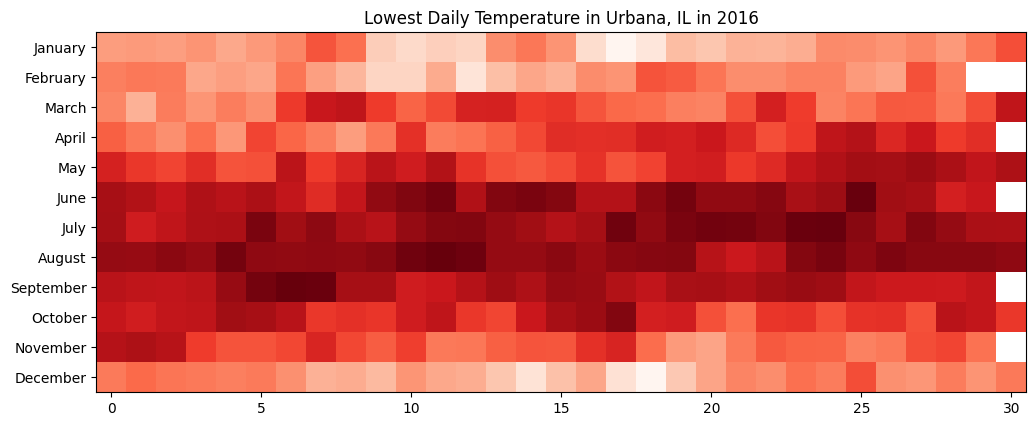

In [40]:
# matplotlib version

plt.figure(figsize=(12, 8))

plt.imshow(heatmap, cmap='Reds')

plt.yticks(range(12), labels=months)

plt.title("Lowest Daily Temperature in Urbana, IL in 2016")

plt.show()

`seaborn` is similar:

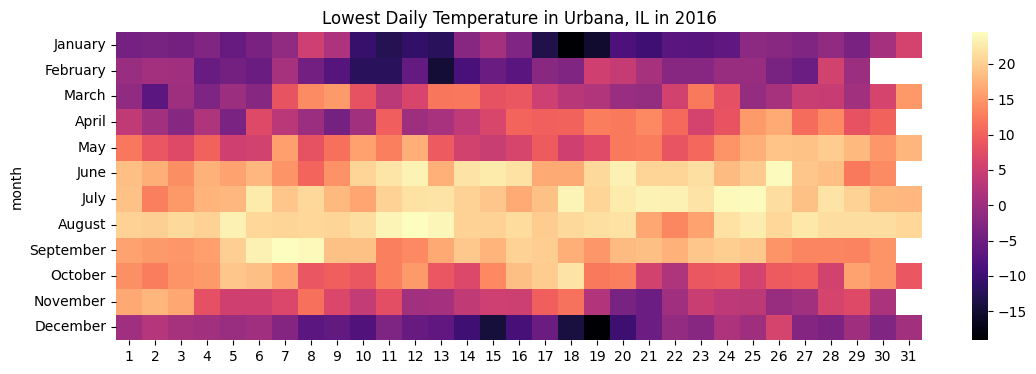

In [ ]:
# seaborn version

plt.figure(figsize=(13, 4))
sns.heatmap(
    heatmap,
    cmap='magma',
    cbar=True
)

plt.title("Lowest Daily Temperature in Urbana, IL in 2016")
plt.yticks(np.arange(12) + 0.5, labels=months, rotation=0) # move tick marks to middle of box
plt.xlabel("")
plt.show()

In [29]:
# altair version

alt.Chart(year_2016[['month', 'day', 'temperature_2m_min']]).mark_rect().encode(
    x=alt.X(
        'day:O',
        title='Day of Month'
    ),
    y=alt.Y(
        'month:O',
        sort=list(range(1, 13)),
        axis=alt.Axis(
            values=list(range(1, 13)),
            labelExpr=f"[{', '.join(repr(m) for m in months)}][datum.value - 1]" # labels our y-axis with month labels
        ),
        title=None
    ),
    color=alt.Color(
        'temperature_2m_min:Q',
        scale=alt.Scale(scheme='redyellowblue', reverse=True),
        legend=alt.Legend(
            title='Temp (°C)',
            titleFontSize=10,
            labelFontSize=10,
            gradientLength=338,
            gradientThickness=26 # customization for color bar
        )
    ),
    tooltip = [alt.Tooltip('temperature_2m_min:Q', title='Temp (°C)')],
).properties(
    title='Lowest Daily Temperature in Urbana, IL in 2016',
    width=800,
    height=350
)

alt.Chart(...)

Here we have linked the full documentation for [Matplotlib](https://matplotlib.org/stable/index.html), [Seaborn](https://seaborn.pydata.org/) and [Altair](https://altair-viz.github.io/). Making sure your visualizations are easy to grasp and aesthetically pleasing is more important than you might think (for example, you might be familiar with [this](https://waf.cs.illinois.edu/discovery/every_gen_ed_at_uiuc_by_gpa/) beautiful one). So do some research and make them pretty!